In [1]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from my_functions import replace

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
cv1_df = pd.read_pickle('pickle/cv1_df.pkl')

In [4]:
# created dataframe of word counts from prophecies tokenized using count_vectorizer.
word_count_df = pd.DataFrame(cv1_df.sum()).reset_index()
word_count_df.rename({'index': 'word', 0: 'count'}, axis = 1, inplace = True)

In [5]:
# sorted word_count_df by counts and kept only the top 10 for top_10 df.
top_10_df = word_count_df.sort_values(by = 'count', ascending = False)[0:10]

In [6]:
top_10_df

,word,count
308,great,395
183,die,147
136,come,132
370,king,114
460,near,95
79,bleed,86
377,land,86
499,people,81
602,sea,79
513,place,73


In [7]:
sns.set_context('paper', font_scale = 1.5)

In [8]:
# read in new dataframe comparing nostradamus and the prophecy in google trends.
df = pd.read_csv('nostradamus_google_trends.csv').reset_index()

In [9]:
# removed header row from dataframe.
df.columns = ['month', 'nostradamus_wordwide', 'prophecy_worldwide']
df = df.loc[1:]

In [10]:
df['month'] = pd.to_datetime(df['month'])

In [11]:
df['nostradamus_wordwide'] = df['nostradamus_wordwide'].astype(int)
df['prophecy_worldwide'] = df['prophecy_worldwide'].astype(int)

In [12]:
sns.set_context("paper", font_scale=1.5) 

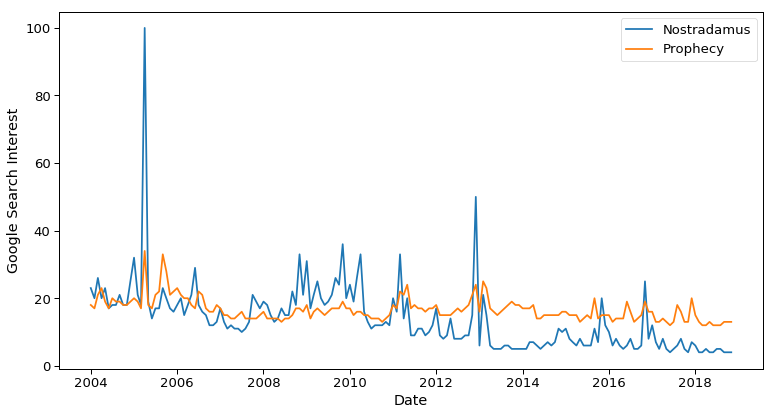

In [13]:
# plotted search interest for nostradamus_wordwide and prophecy_worldwide on a line graph.
plt.figure(figsize = (11, 6))

ax = sns.lineplot(x="month", y="nostradamus_wordwide", data = df, lw = 1.75)
ax = sns.lineplot(x="month", y="prophecy_worldwide", data = df, lw = 1.75)
plt.xlabel('Date')
plt.ylabel('Google Search Interest')

plt.legend(['Nostradamus', 'Prophecy'], loc = 'best')
plt.tight_layout()
plt.savefig('visualizations/nostradamus_vs_prophecy_google_search.png')

In [14]:
# created new dataframes for 3 topic lsa models.
# both are fitted on prophecies.
# X_lsa_3 contains distributions of prophecy topics across prophecies.
# y_lsa_3 contains distributions of prophecy topics across prephace and Epistle to Henry II.
X_df = pd.read_csv('topic_cluster_coordinates/X_lsa_3.csv')
X_df.drop('Unnamed: 0', axis = 1, inplace = True)
X_df['document_type'] = 'Prophecy'
y_df = pd.read_csv('topic_cluster_coordinates/y_lsa_3.csv')
y_df.drop('Unnamed: 0', axis = 1, inplace = True)
y_df['document_type'] = 'Other'

In [15]:
plot_df = pd.concat([X_df, y_df], axis = 0, join = 'outer')

In [16]:
plot_df['Max_Topic'] = plot_df['Max_Topic'].astype(str)

In [17]:
plot_df['Max_Topic'].value_counts()

0    856
1     54
2     34
Name: Max_Topic, dtype: int64

In [18]:
substitutions = {'2': '3', '1': '2', '0': '1'}
plot_df['Topic Number'] = deepcopy(replace(plot_df['Max_Topic'], substitutions))
plot_df['Topic Number'] = plot_df['Topic Number'].astype(int)
plot_df['Max_Topic'] = plot_df['Max_Topic'].astype(int)

In [19]:
plot_df.columns

Index(['PCA1', 'PCA2', 'Max_Topic', 'PCA1_adj', 'PCA2_adj', 'document_type',
       'Topic Number'],
      dtype='object')

In [20]:
sns.set_context('paper', font_scale = 1.5) 

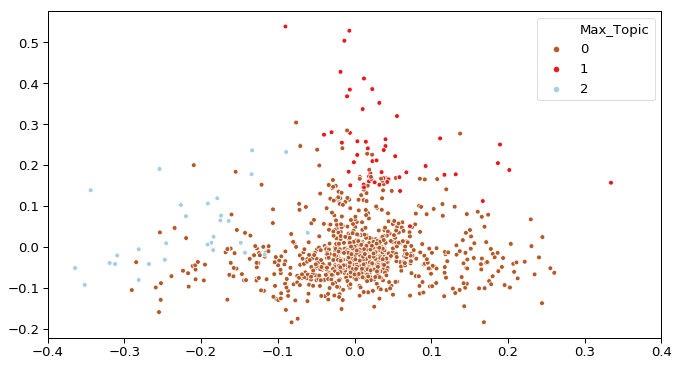

In [26]:
# plotted topic clusters on adjusted/rotated PCA axes.
plt.figure(figsize = (11, 6))
ax = sns.scatterplot(x="PCA1_adj", y="PCA2_adj", hue="Max_Topic", data=plot_df, palette = "Paired_r")
ax.grid(False, which='both')
# ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')
plt.xlim(-.4, .4);
# plt.ylim(-.55, .55);
ax.set_ylabel('')
ax.set_xlabel('');